In [8]:
%%bash
./extract_vector_vae.py result_0207/

{'SOURCE': 'data_utanet/train.txt',
 'SOURCE_VOCAB': 'data_utanet/train.vocab',
 'TARGET': 'data_utanet/train.txt',
 'TARGET_VOCAB': 'data_utanet/train.vocab',
 'batchsize': 10,
 'denoising_rate': 0.0,
 'epoch': 50,
 'gpu': 0,
 'layer': 2,
 'log_interval': 200,
 'max_source_sentence': 50,
 'max_target_sentence': 50,
 'min_source_sentence': 2,
 'min_target_sentence': 2,
 'n_embed': 300,
 'n_latent': 100,
 'resume': 'result_0207/model.npz',
 'type_unit': 'gru',
 'unit': 200,
 'validation_interval': 1000,
 'validation_source': 'data_utanet/test.txt',
 'validation_target': 'data_utanet/test.txt',
 'word_dropout': 0.0}
loading...: data_utanet/test.txt
loading...: data_utanet/test.txt
[[ 1.08548903 -0.07178961 -0.71521795 ...,  0.64207464  1.71462429
  -2.65825558]
 [ 1.36562181  0.06124112  0.22327726 ..., -0.64991915 -0.6046496
   0.61752468]
 [-0.82018292  0.15345825  0.67543566 ..., -0.92911351 -0.43266833
   0.82284349]
 ..., 
 [ 0.36253422  0.04266569 -0.61764514 ..., -1.37150943  0.29

/usr/local/lib/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
100% (1375 of 1375) |#####################| Elapsed Time: 0:00:00 Time: 0:00:00
100% (1375 of 1375) |#####################| Elapsed Time: 0:00:00 Time: 0:00:00


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

# AutoEncoder で抽出した特徴ベクトルを PCA にかける

### メモ

- attention なしだと累積寄与率が1%程度上昇
    ただし、attenntion ありの方が分離がうまく行っているように見える…
    
- 第0～2成分までは、タイトルの文字数に対する相関が強い（当然か…）
    学習もまず文字数から合わせにいっている様子だし
   

### TODO

- unit数を減らして自由度を減らす（文字数に相関の強い成分が多いので）

    -> unit = 50, layer = 2 まで減らすと、文字数への相関を第0成分に
       押し込めることができたように見える

データセットの数: 1000, 特徴量の次元: 100
アーティストの数: 30
20までの累積寄与率: 0.35551147907972336
pc1=0 ------------


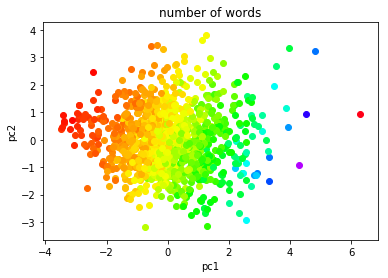

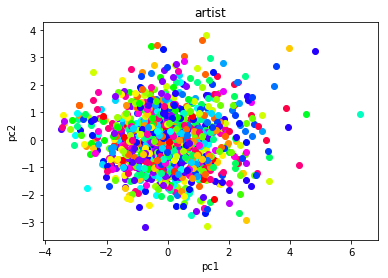

pc1=1 ------------


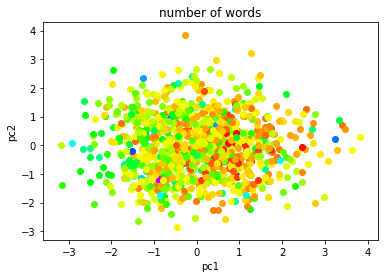

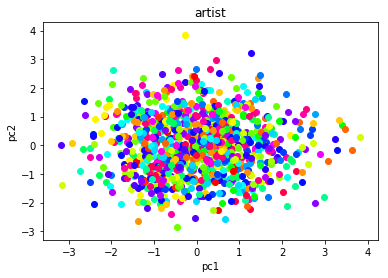

pc1=2 ------------


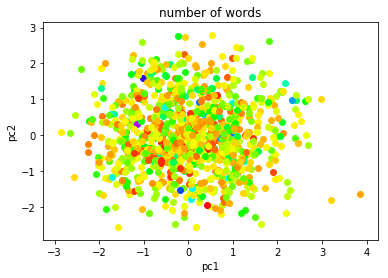

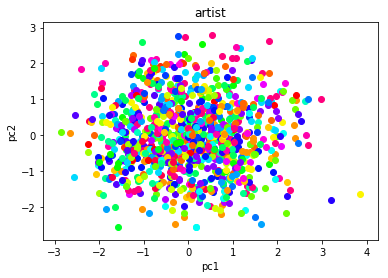

pc1=3 ------------


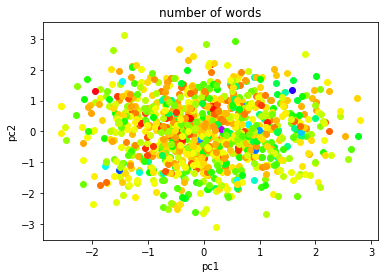

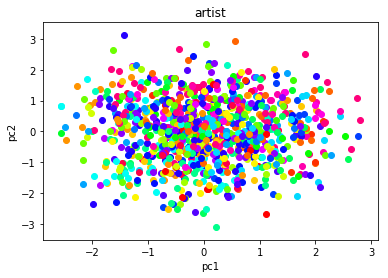

pc1=4 ------------


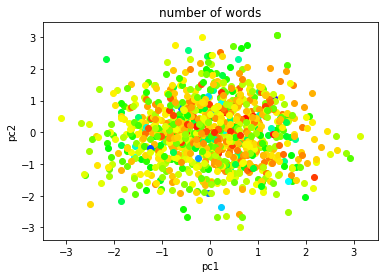

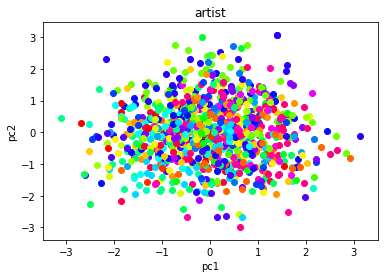

pc1=5 ------------


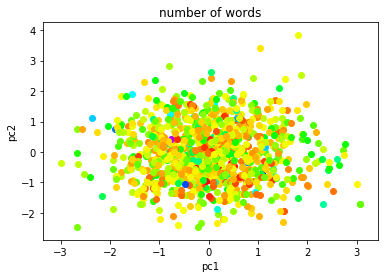

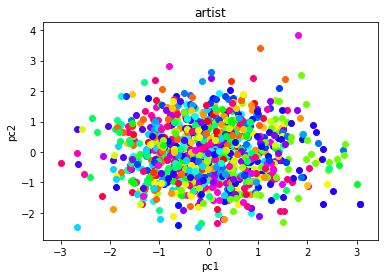

pc1=6 ------------


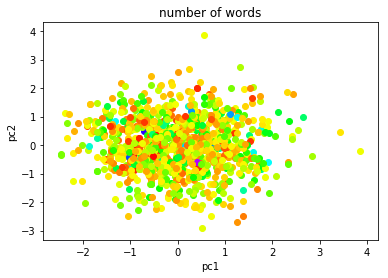

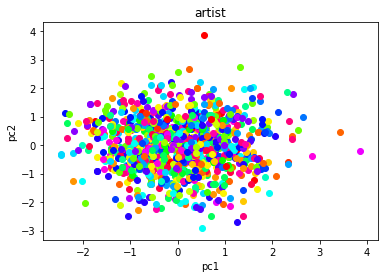

pc1=7 ------------


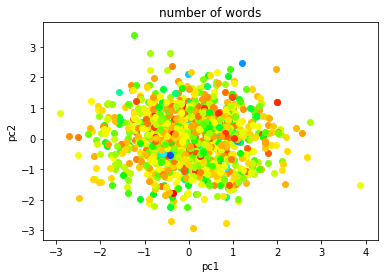

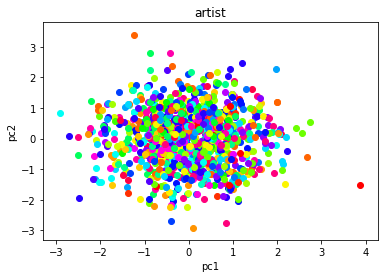

pc1=8 ------------


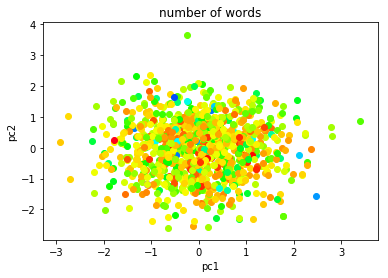

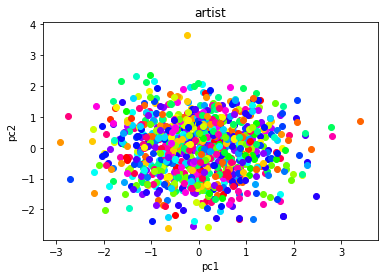

pc1=9 ------------


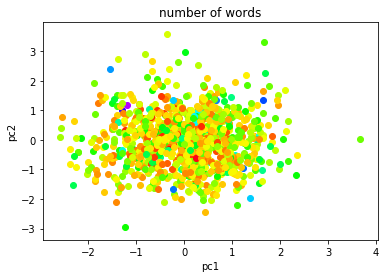

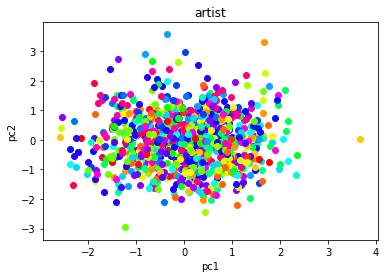

In [22]:
import pickle
import matplotlib.cm as cm

n = 20
pkl_file = 'result_0208_C041/vector.pkl'
cnt_file = 'data_utanet/test_cnt.txt'
art_file = 'data_utanet/test_a.txt'

# pkl file の情報
with open(pkl_file, 'rb') as f:
    vectors = pickle.load(f)

print('データセットの数: {}, 特徴量の次元: {}'.\
      format(vectors.shape[0], vectors.shape[1]))

# artist file の情報
with open(art_file, 'r') as f:
    art_list = [line.split('.')[0] for line in f.readlines()[:vectors.shape[0]]]
    n_art = len(set(art_list))
print('アーティストの数: {}'.format(n_art))

# word count file の情報
with open(cnt_file, 'r') as f:
    cnt_list = [int(line) for line in f.readlines()[:vectors.shape[0]]]
    
# # encoder のどのレイヤの h が重要か調べる
# vs = np.split(np.array(vectors), 1, axis=1)
# stds = [np.std(v) for v in vs]
# print('レイヤごとの分散: {}'.format(stds))
    
# 主成分分析する
pca = PCA(n_components=n)
pca.fit(vectors)
pca_vectors = pca.fit_transform(vectors)


# 主成分の寄与率を出力する
#print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('{0}までの累積寄与率: {1}'.\
      format(n, sum(pca.explained_variance_ratio_)))

# アーティストごとに色を指定する
art_colors = {}
for i, art in enumerate(set(art_list)):
    art_colors[art] = float(i/n_art)

# 主成分をプロットする
for pc1 in range(10):
    pc2 = pc1 + 1
    print('pc1={} ------------'.format(pc1))

    for v, c in zip(pca_vectors, cnt_list):
        plt.scatter(v[pc1], v[pc2],
                    color=cm.hsv(float(c/max(cnt_list))))
    plt.title('number of words')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.show()
    
    for v, c in zip(pca_vectors, art_list):
        plt.scatter(v[pc1], v[pc2],
                    color=cm.hsv(art_colors[c]))
    plt.title('artist')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.show()
